# Jonathan Halverson
# Friday, October 6, 2017
# Chapter 5 Geron: SVM

### Linear SVM

Linear SVM is concerned with finding a hyperplane the divides the classes in a one-versus-rest manner. There is hard and soft margin approaches. The C parameter determines how much misclassification to tolerate when soft margin is used. The idea is to minimize the normal vector of the hyperplane subject to contraints. This is a QP problem.

Let's try a model to predict hand written digits using SVM.

In [1]:
from sklearn import datasets

In [2]:
dir(datasets.load_digits())

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
X = datasets.load_digits().data
y = datasets.load_digits().target

In [4]:
X.shape

(1797, 64)

In [5]:
y.shape

(1797,)

In [6]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [7]:
X.max()

16.0

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

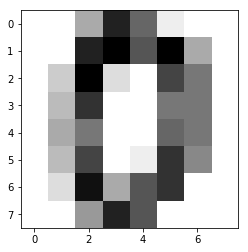

In [9]:
plt.imshow(X[0].reshape(8, 8), cmap=matplotlib.cm.binary, interpolation='none')

Indeed this is a zero:

In [10]:
y[0]

0

Let's split the data so we can create a model and then find the generalization error on the untouched test set:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
X_train.shape, y_train.shape

((1347, 64), (1347,))

In [13]:
X_test.shape, y_test.shape

((450, 64), (450,))

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [15]:
linear_svm_clf = Pipeline([('std_sc', StandardScaler()), ('linear_svc', LinearSVC(C=1.0, loss='hinge'))])

In [16]:
linear_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [17]:
y_pred = linear_svm_clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.95999999999999996

In [19]:
linear_svm_clf.predict([X_test[8]]), y_test[8]

(array([5]), 5)

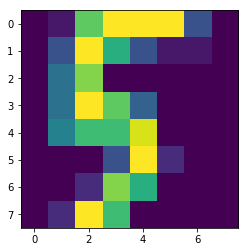

In [20]:
plt.imshow(X_test[8].reshape(8, 8))

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  2,  0],
       [ 0,  1,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 55,  2,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 45]])

Let's find the optimal C value which sets the relative weight between minimizing the square of the weight vector and the sum of the slack variables (see Equation 5-4 of Geron).

In [23]:
import numpy as np
param_grid = [{'linear_svc__C':np.logspace(-2, 0, 50)}]

In [24]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(linear_svm_clf, param_grid, cv=5, scoring='accuracy')

In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'linear_svc__C': array([ 0.01   ,  0.01099,  0.01207,  0.01326,  0.01456,  0.016  ,
        0.01758,  0.01931,  0.02121,  0.0233 ,  0.0256 ,  0.02812,
        0.03089,  0.03393,  0.03728,  0.04095,  0.04498,  0.04942,
        0.05429,  0.05964,  0.06551,  0.07197,  0.07906,  0.08685,
  ...49,
        0.51795,  0.56899,  0.62506,  0.68665,  0.75431,  0.82864,
        0.9103 ,  1.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Note that one the best estimator is found the model is retrained using all the data using the optimal estimator's parameters.

In [26]:
grid_search.best_estimator_

Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=0.086851137375135251, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [27]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.95999999999999996

### Nonlinear SVM Classification

We tried do polynomial features with only degree 2 on the MNIST data set but it ran too slow. Here we work with the moons data set.

In [28]:
from sklearn.datasets import make_moons

In [29]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

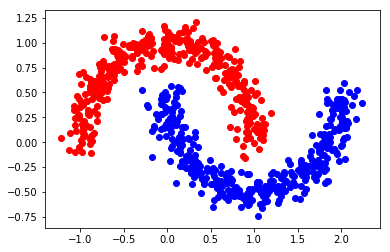

In [30]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], c='r')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c='b')

In [31]:
param_grid = [{'linear_svc__C':np.logspace(-2, 1, 50)}]
grid_search = GridSearchCV(linear_svm_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'linear_svc__C': array([  0.01   ,   0.01151,   0.01326,   0.01526,   0.01758,   0.02024,
         0.0233 ,   0.02683,   0.03089,   0.03556,   0.04095,   0.04715,
         0.05429,   0.06251,   0.07197,   0.08286,   0.09541,   0.10985,
         0.12649,   0.14563,   0.16768,   0.19307, ...     3.72759,   4.29193,   4.94171,   5.68987,   6.55129,   7.54312,
         8.68511,  10.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [32]:
grid_search.best_estimator_

Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1.0481131341546852, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [33]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.89600000000000002

Let's look to see where the classifier is failing (black points):

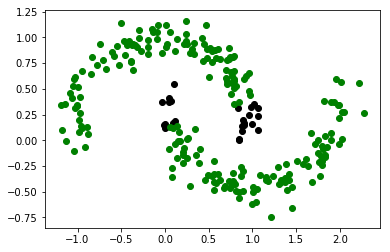

In [34]:
plt.scatter(X_test[y_test!=y_pred][:,0], X_test[y_test!=y_pred][:,1], c='k')
plt.scatter(X_test[y_test==y_pred][:,0], X_test[y_test==y_pred][:,1], c='g')

For comparison what happens with logistic regression:

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logistic_clf = Pipeline([('std_sc', StandardScaler()), ('log_reg', LogisticRegression())])

In [37]:
param_grid = [{'log_reg__C':np.logspace(-2, 1, 50)}]
grid_search = GridSearchCV(logistic_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'log_reg__C': array([  0.01   ,   0.01151,   0.01326,   0.01526,   0.01758,   0.02024,
         0.0233 ,   0.02683,   0.03089,   0.03556,   0.04095,   0.04715,
         0.05429,   0.06251,   0.07197,   0.08286,   0.09541,   0.10985,
         0.12649,   0.14563,   0.16768,   0.19307,   0...     3.72759,   4.29193,   4.94171,   5.68987,   6.55129,   7.54312,
         8.68511,  10.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [38]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.89200000000000002

In [39]:
grid_search.best_estimator_

Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.33932217718953278, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

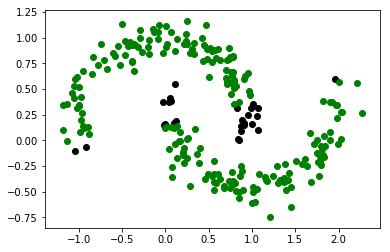

In [40]:
plt.scatter(X_test[y_test!=y_pred][:,0], X_test[y_test!=y_pred][:,1], c='k')
plt.scatter(X_test[y_test==y_pred][:,0], X_test[y_test==y_pred][:,1], c='g')

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly_svm_clf = Pipeline([('poly_features', PolynomialFeatures(degree=3)),
                         ('std_sc', StandardScaler()),
                         ('linear_svc', LinearSVC(C=1.0, loss='hinge'))])

In [43]:
param_grid = [{'linear_svc__C':np.logspace(-2, 1, 25)}]
grid_search = GridSearchCV(poly_svm_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'linear_svc__C': array([  0.01   ,   0.01334,   0.01778,   0.02371,   0.03162,   0.04217,
         0.05623,   0.07499,   0.1    ,   0.13335,   0.17783,   0.23714,
         0.31623,   0.4217 ,   0.56234,   0.74989,   1.     ,   1.33352,
         1.77828,   2.37137,   3.16228,   4.21697,   5.62341,   7.49894,
        10.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [44]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

We see that the model with the addition of third order polynomial features performs perfectly. Now let's actually use a polynomial kernel instead of explicitly generating the features as was done above.

### Polynomial kernel

In [62]:
from sklearn.svm import SVC

svm_clf_poly = Pipeline([('std_sc', StandardScaler()),
                         ('poly_svc', SVC(kernel='poly', degree=3, C=1.0, coef0=1))])

In [63]:
param_grid = [{'poly_svc__C':np.logspace(-2, 1, 10), 'poly_svc__coef0':np.logspace(-2, 1, 10)}]
grid_search = GridSearchCV(svm_clf_poly, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly_svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=30, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'poly_svc__C': array([  0.01   ,   0.02154,   0.04642,   0.1    ,   0.21544,   0.46416,
         1.     ,   2.15443,   4.64159,  10.     ]), 'poly_svc__coef0': array([  0.01   ,   0.02154,   0.04642,   0.1    ,   0.21544,   0.46416,
         1.     ,   2.15443,   4.64159,  10.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [64]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [66]:
#grid_search.cv_results_

Note that when the order is made 30, the time required to train the model (or pipeline) is still very quick. If these features were generated explicitly then it would take too long.

### Similarity features

The idea here is to introduce landmarks and compute the distance or some measure of the distance between each record and the landmark. This creates many new features. For instance, one can choose each record as a landmark. The number of new features increases by m, which is the number total records. A common choice for the distance measure is the Gaussian radial basis function. The gamma value determines how fast the similarity decays to zero. When gamma is large, it decays fast.

In [68]:
svm_clf_rbf = Pipeline([('std_sc', StandardScaler()),
                         ('rbf_svc', SVC(kernel='rbf', C=1.0, gamma=1))])

In [69]:
param_grid = [{'rbf_svc__C':np.logspace(-2, 1, 10), 'rbf_svc__gamma':np.logspace(-2, 1, 10)}]
grid_search = GridSearchCV(svm_clf_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rbf_svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'rbf_svc__C': array([  0.01   ,   0.02154,   0.04642,   0.1    ,   0.21544,   0.46416,
         1.     ,   2.15443,   4.64159,  10.     ]), 'rbf_svc__gamma': array([  0.01   ,   0.02154,   0.04642,   0.1    ,   0.21544,   0.46416,
         1.     ,   2.15443,   4.64159,  10.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [70]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

1.0